# Load Modules

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential

# Collect The Data

In [26]:
no_tumor_images=os.listdir('../brain-tumor-detection-master/brain_tumor/Training/no_tumor/')
have_tumor_images=os.listdir('../brain-tumor-detection-master/brain_tumor/Training/pituitary_tumor/')
dataset=[]
label=[]
INPUT_SIZE=64

In [10]:
# no tumor 
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread('../brain-tumor-detection-master/brain_tumor/Training/no_tumor/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

# have tumor
for i, image_name in enumerate(have_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread('../brain-tumor-detection-master/brain_tumor/Training/pituitary_tumor/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

print(len(dataset))
print(len(label))

3666
3666


# Train  80% , Test 20% and Split

In [16]:
dataset=np.array(dataset)
label=np.array(label)

# Train  80% , Test 20% and Split

x_train, x_test, y_train, y_test= train_test_split(dataset,label,test_size=0.2, random_state=0)
# Reshape = (n, image_width, image_height, n_channel)

print("Train  80%: ",x_train.shape)
print(y_train.shape)


print("Test  20%: ",x_test.shape)
print(y_test.shape)

# 3 is channel RGB

Train  80%:  (2932, 64, 64, 3)
(2932,)
Test  20%:  (734, 64, 64, 3)
(734,)


In [65]:
# Categorise
x_train = normalize(x_train,axis=1)
x_test = normalize(x_train,axis=1)

In [38]:
np.unique(y_test)

array([0, 1])

In [49]:
pd.Series(y_test).value_counts()

1    492
0    242
Name: count, dtype: int64

# Visualize Data

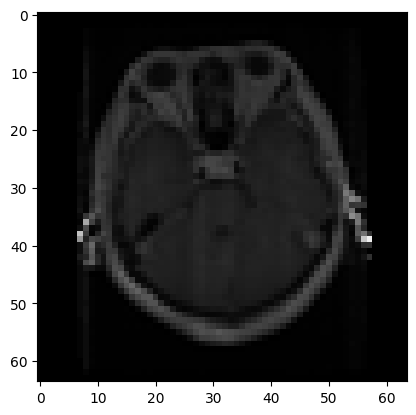

In [70]:
plt.imshow(x_train[0], cmap='gray')

# Prepare data

In [64]:
# reshape data into a 2D 
X_train_updated = x_train.reshape(len(x_train), -1)
X_test_updated = x_test.reshape(len(x_test), -1)

print(X_train_updated.shape)
print(X_test_updated.shape)


(2932, 12288)
(2932, 12288)


In [78]:
print("Train Max :",x_train.max(),"Train Min",  x_train.min())
print("Test Max: ",x_test.max(),"Test Min", x_test.min())
xtrain = x_train/255
xtest = x_test/255
print("Train x_train/255 Max :",x_train.max(), " and Train Min is: ", xtrain.min())
print("Test x_test/255 Max: ", x_test.max(), ' and Test Min: ', xtest.min())

Train Max : 1.0 Train Min 0.0
Test Max:  1.0 Test Min 0.0
Train x_train/255 Max : 1.0  and Train Min is:  0.0
Test x_test/255 Max:  1.0  and Test Min:  0.0


## Feature Scaling

In [81]:
from sklearn.decomposition import PCA

In [83]:
print(x_train.shape, x_test.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = x_train
pca_test = x_test

(2932, 64, 64, 3) (2932, 64, 64, 3)


# Train Model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, y_train)


In [ ]:
sv = SVC()
sv.fit(pca_train, y_train)

In [84]:
print("Training Score:", lg.score(pca_train, y_train))
print("Testing Score:", lg.score(pca_test, y_test))

NameError: name 'ytrain' is not defined

In [85]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

NameError: name 'sv' is not defined

In [ ]:
# # build the model. Binary Classification Problem
# model=Sequential()
# model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model=Sequential()
# model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model=Sequential()
# model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# # Binary CrossEntropy = 1, sigmoid
# # Categorial Cross Entropy = 2, softmax

# model.compile(loss ='binary_crossentropy', optimizer='adam',)

# model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=False)

# model.save("BrainTumor.h5")